In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

In [43]:
data = pd.read_csv("secondary_car_market.csv",low_memory=False)

In [44]:
data.shape

(300000, 10)

In [45]:
data.head()

,maker,model,mileage,manufacture_year,transmission,door_count,seat_count,displacement,horse_power,price
0,audi,a8,136702.0,2006.0,auto,4.0,5.0,3.94,271.0,12285.0
1,audi,a3,102526.0,2004.0,man,4,5,1.97,138.0,5500.0
2,audi,a3,684.0,2016.0,auto,5.0,5.0,1.97,148.0,39649.0
3,audi,s7,38525.0,2013.0,auto,5.0,4.0,3.99,414.0,64233.0
4,audi,a1,45006.0,2010.0,man,3,4,1.60,103.0,16848.0


In [46]:
data.describe()

,mileage,manufacture_year,displacement,horse_power,price
count,3.000000e+05,300000.000000,300000.000000,300000.000000,3.000000e+05
mean,6.373923e+04,2009.096253,1.876543,136.943660,1.660514e+04
std,8.628841e+04,16.946915,0.904341,63.155779,5.958110e+04
min,0.000000e+00,39.000000,0.010000,13.000000,0.000000e+00
25%,1.599200e+04,2006.000000,1.560000,101.000000,4.797000e+03
50%,5.591400e+04,2011.000000,1.900000,123.000000,1.345500e+04
75%,9.693400e+04,2014.000000,1.980000,154.000000,2.327100e+04
max,6.213709e+06,2017.000000,32.770000,1337.000000,3.042000e+07


In [47]:
#The data seems to be quite skewed. The extreme values (min and max) for almost all features are very away from mean/median 
#values. We will investigate this more when we do analysis for each feature. 

In [48]:
data.describe(include=['object'])

,maker,model,transmission,door_count,seat_count
count,300000,300000,300000,300000,300000
unique,3,105,2,15,33
top,audi,golf,man,5.0,5.0
freq,100000,32427,219799,93607,170526


In [49]:
# Total 10 features
# 5 Continuous
# 5 Categorical

In [50]:
data.isnull().sum()

maker               0
model               0
mileage             0
manufacture_year    0
transmission        0
door_count          0
seat_count          0
displacement        0
horse_power         0
price               0
dtype: int64

In [51]:
#No missing data

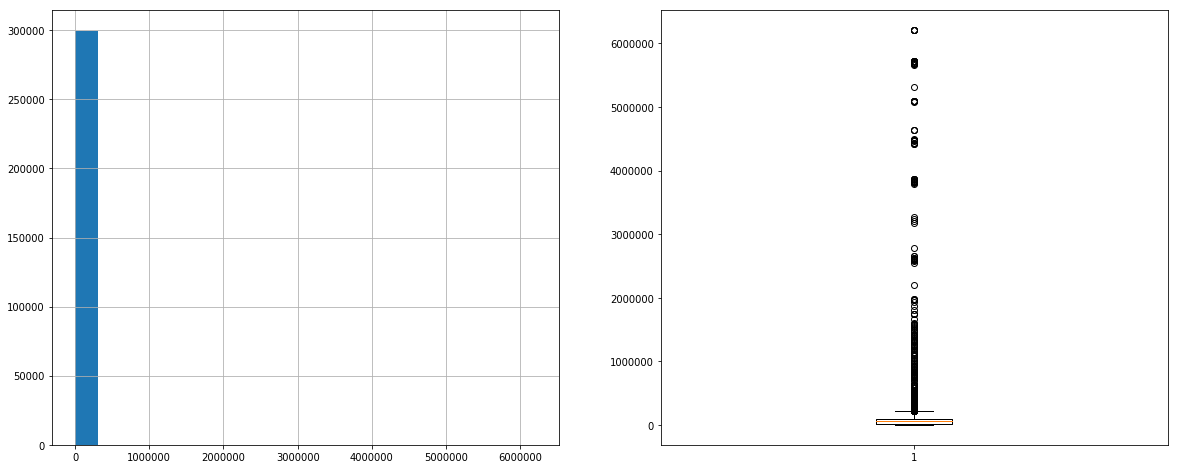

In [52]:
#Mileage
plt.subplot(1,2,1)
data['mileage'].hist(bins=20,figsize=(20,8))

#Mileage
plt.subplot(1,2,2)
plt.boxplot(data['mileage'])
plt.show()


Minimum value for mileage: 0.0
Maximum value for mileage: 6213709.0
Mean value for mileage: 63739.22895
Median value for mileage: 55914.0
P2 value for mileage: 6.0
P98 value for mileage: 180198.0


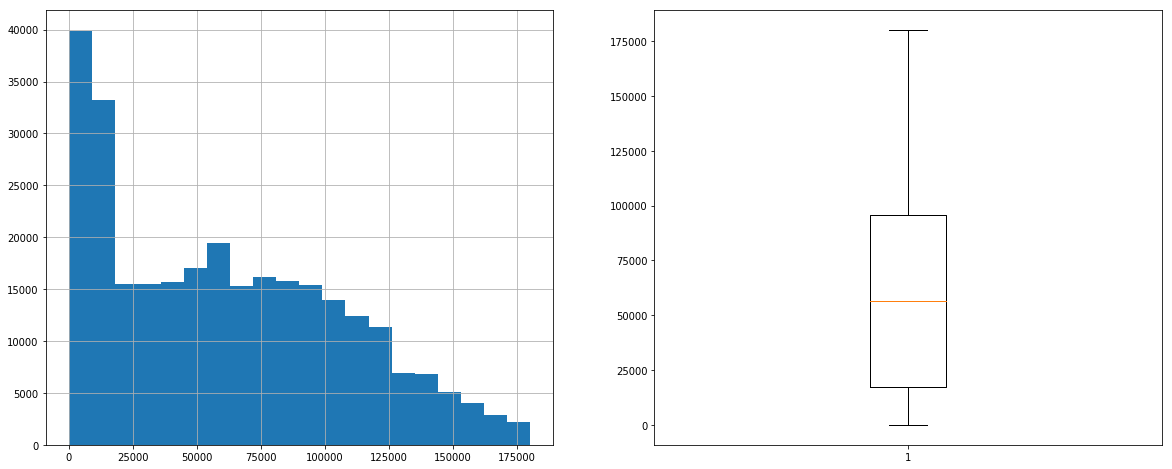

In [53]:
#We see that the data for mileage feature is very skewed. 
#The minimum , maximum, mean, median values are - 
print("Minimum value for mileage:",data['mileage'].min())
print("Maximum value for mileage:",data['mileage'].max())
print("Mean value for mileage:",data['mileage'].mean())
print("Median value for mileage:",data['mileage'].median())

#There can be many ways to remove the outliers. 
# 1. Remove the top and bottom X percent data (for example, mileage<5th percentile and mileage>95th pecentile). 
# 2. Remove only data above certain values (for example, mileage>100)
# 3. Find 1.5 times of Inter Quartlie (Range) as say 'X'. Remove values mileage<'Q1-X' and mileage>'Q3+X'
# 4. Some more ways based on the business/market knowledge.
#
# For simplicity purpose, I will be removing the top 2% and bottom 2% of data rows. 

#let's see what the 2nd percentile and 98th percentile values are - 
lowerBoundMileage = data['mileage'].quantile(0.02)
upperBoundMileage = data['mileage'].quantile(0.98)
print("P2 value for mileage:",lowerBoundMileage)
print("P98 value for mileage:",upperBoundMileage)

#Let's plot the mileage and see how it looks after removing the outliers. 
temp = (data['mileage'])
temp = temp[(temp>lowerBoundMileage) & (temp<upperBoundMileage)]


#Mileage fate removing outliers
plt.subplot(1,2,1)
temp.hist(bins=20,figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(temp)
plt.show()

# 1. Okay now the feature looks reasonable. 
# 2. Another thing, why top and bottom 2 percent? Why not say 5 percent? Well we can certainly do that or any other outlier 
#    approach. Generally we should try different appraoches and see what make sense and gives better result. It is more like 
#    trial and error. 
# 3. Also, not every time we just plainly remove the data rows which contains outliers. We can try replacing the outlier with 
#    reasonable value too. 
# 4. But for now, I will be am using the 2% as bounds and just removing the rows.

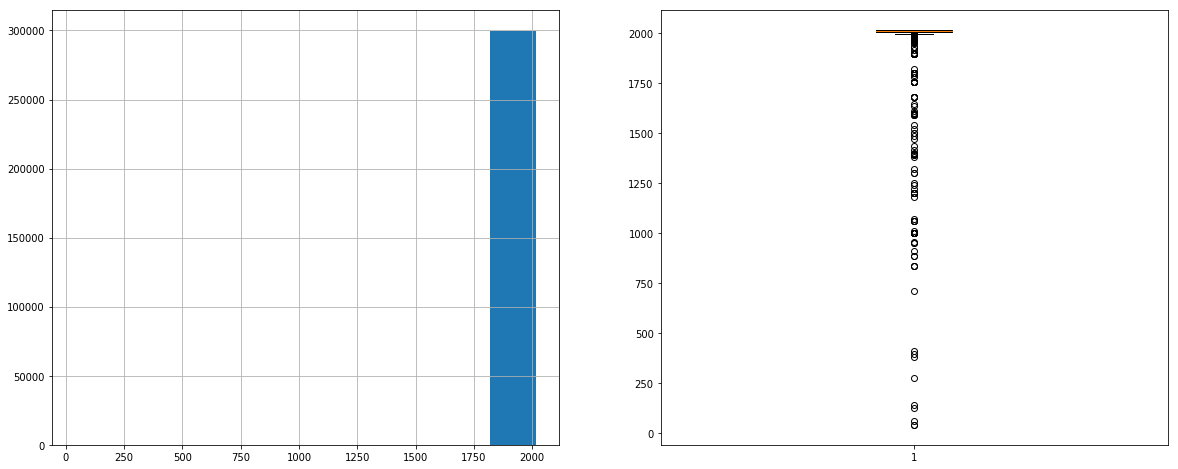

In [54]:
#Lets see the feature Manufacture Year
plt.subplot(1,2,1)
data['manufacture_year'].hist(figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(x=data['manufacture_year'])
plt.show()

Minimum value for manufacture_year: 39.0
Maximum value for manufacture_year: 2017.0
Mean value for manufacture_year: 2009.0962533333334
Median value for manufacture_year: 2011.0
P2 value for manufacture_year: 1996.0
P1 value for manufacture_year: 1994.0
P0.5 value for manufacture_year: 1990.0


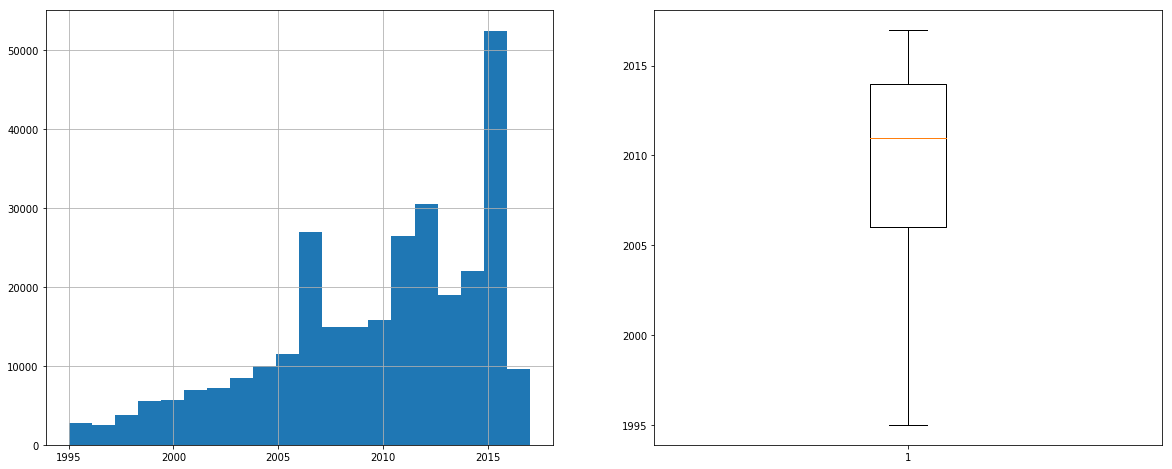

In [55]:
#The manufacture_year feature data seems to be right skewed. 
#The minimum , maximum, mean, median values are - 
print("Minimum value for manufacture_year:",data['manufacture_year'].min())
print("Maximum value for manufacture_year:",data['manufacture_year'].max())
print("Mean value for manufacture_year:",data['manufacture_year'].mean())
print("Median value for manufacture_year:",data['manufacture_year'].median())

#For manufacture_year,we would be only removing the rows which has low values. 
#As it is a temporal feature, we want to keep the highest values as those represent the most recent year. 

#Let's see what the lower percentile values are - 
print("P2 value for manufacture_year:",data['manufacture_year'].quantile(0.02))
print("P1 value for manufacture_year:",data['manufacture_year'].quantile(0.01))
print("P0.5 value for manufacture_year:",data['manufacture_year'].quantile(0.005))

#1st percentile seems reasonable for the lower bound year. Highly unlikely that someone will purchase a car which is older than 
#15 years
lowerBoundManufactureYear = data['manufacture_year'].quantile(0.01)

#Let's plot the manufacture_year and see how it looks after removing the outliers. 
temp = (data['manufacture_year'])
temp = temp[(temp>lowerBoundManufactureYear)]


#manufacture_year afterfate removing outliers
plt.subplot(1,2,1)
temp.hist(bins=20,figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(temp)
plt.show()


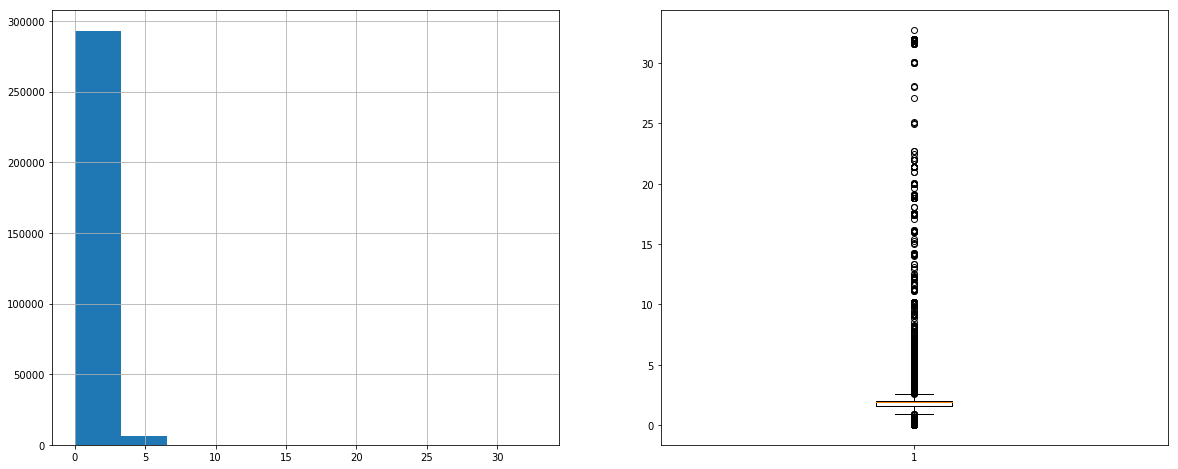

In [56]:
#Lets see the feature Displacement
plt.subplot(1,2,1)
data['displacement'].hist(figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(x=data['displacement'])
plt.show()

Minimum value for displacement: 0.01
Maximum value for displacement: 32.77
Mean value for displacement: 1.876542533330281
Median value for displacement: 1.9
P1 value for displacement: 1.0
P99 value for displacement: 4.16


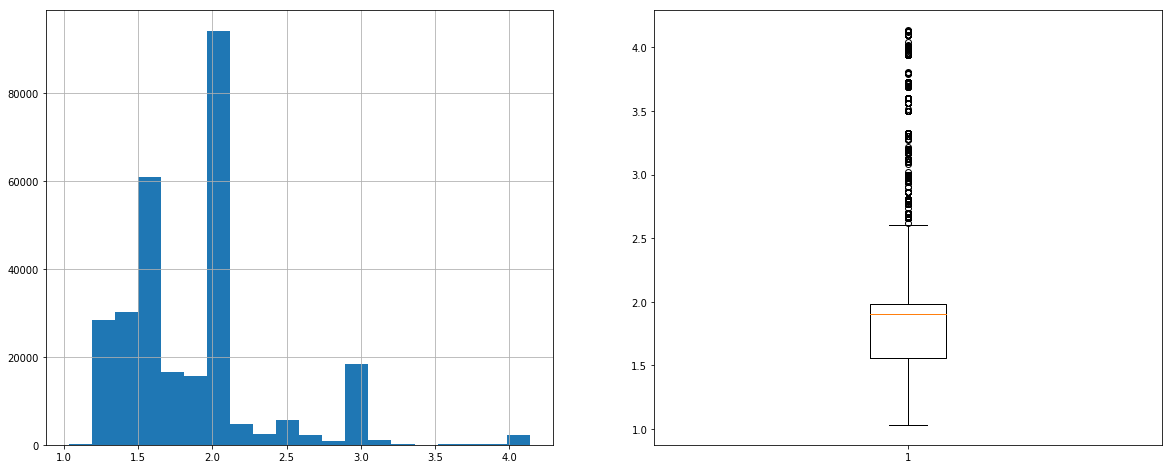

In [57]:
#The displacement feature data seems to be left skewed. 
#The minimum , maximum, mean, median values are - 
print("Minimum value for displacement:",data['displacement'].min())
print("Maximum value for displacement:",data['displacement'].max())
print("Mean value for displacement:",data['displacement'].mean())
print("Median value for displacement:",data['displacement'].median())

# For simplicity purpose, I will be removing the top 1% and bottom 1% of data rows. 
lowerBoundDisplacement = data['displacement'].quantile(0.01)
upperBoundDisplacement = data['displacement'].quantile(0.99)
print("P1 value for displacement:",lowerBoundDisplacement)
print("P99 value for displacement:",upperBoundDisplacement)


#Let's plot the displacement and see how it looks after removing the outliers. 
temp = (data['displacement'])
temp = temp[(temp>lowerBoundDisplacement) & (temp<upperBoundDisplacement)]


#Mileage after removing outliers
plt.subplot(1,2,1)
temp.hist(bins=20,figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(temp)
plt.show()


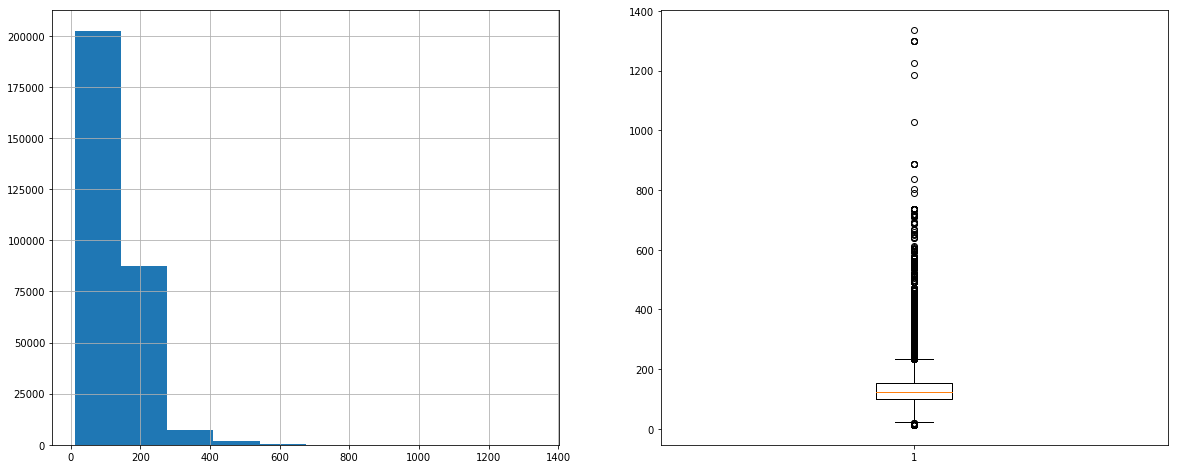

In [58]:
#Lets see the feature Horse_Power
plt.subplot(1,2,1)
data['horse_power'].hist(figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(x=data['horse_power'])
plt.show()


Minimum value for horse_power: 13.0
Maximum value for horse_power: 1337.0
Mean value for horse_power: 136.94366
Median value for horse_power: 123.0
P1 value for horse_power: 59.0
P99 value for horse_power: 366.0


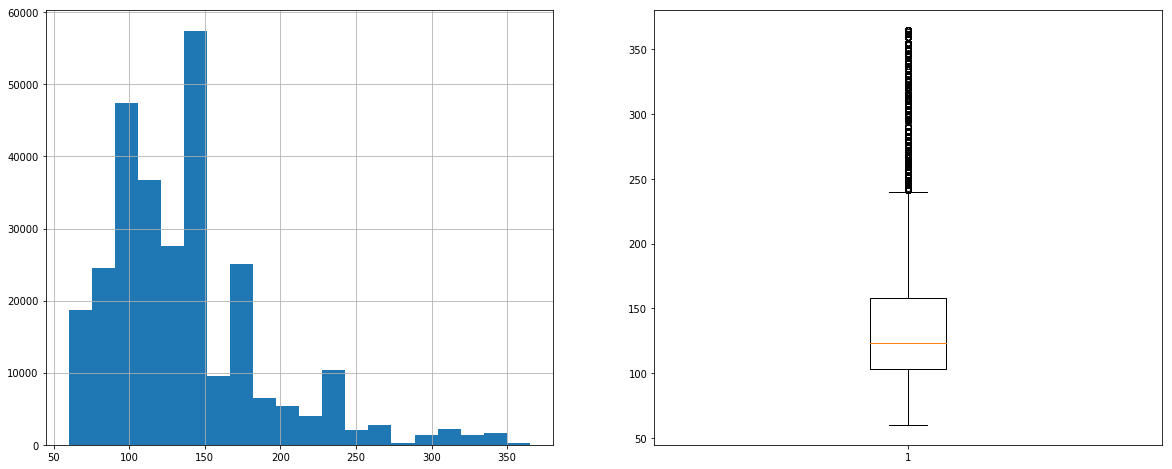

In [59]:
#The minimum , maximum, mean, median values are - 
print("Minimum value for horse_power:",data['horse_power'].min())
print("Maximum value for horse_power:",data['horse_power'].max())
print("Mean value for horse_power:",data['horse_power'].mean())
print("Median value for horse_power:",data['horse_power'].median())

# For simplicity purpose, I will be removing the top 1% and bottom 1% of data rows. 
# I am not sure if 1% for upper bound is a ideal choice. I guess in practical world, we may also want to try put a limit on a 
# certain value like 500 instead of 1%.
lowerBoundHorsePower = data['horse_power'].quantile(0.01)
upperBoundHorsePower = data['horse_power'].quantile(0.99)
print("P1 value for horse_power:",lowerBoundHorsePower)
print("P99 value for horse_power:",upperBoundHorsePower)

#Let's plot the horse_power and see how it looks after removing the outliers. 
temp = (data['horse_power'])
temp = temp[(temp>lowerBoundHorsePower) & (temp<upperBoundHorsePower)]


#Mileage after removing outliers
plt.subplot(1,2,1)
temp.hist(bins=20,figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(temp)
plt.show()

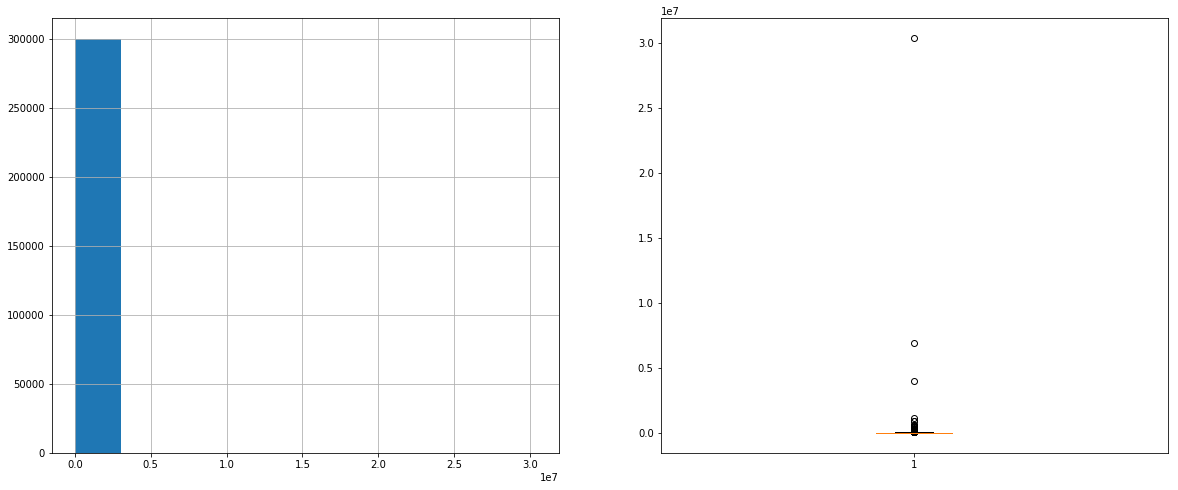

Minimum value for price: 0.0
Maximum value for price: 30420000.0
Mean value for price: 16605.141743333334
Median value for price: 13455.0
P1 value for price: 866.0
P99 value for price: 70189.04000000004


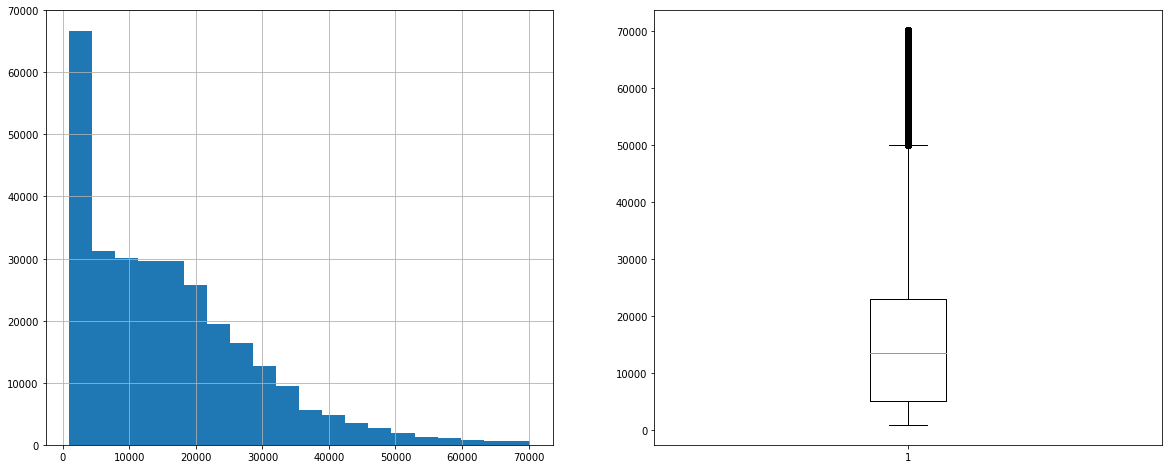

In [60]:
#Lets see the feature price
plt.subplot(1,2,1)
data['price'].hist(figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(x=data['price'])
plt.show()


#The minimum , maximum, mean, median values are - 
print("Minimum value for price:",data['price'].min())
print("Maximum value for price:",data['price'].max())
print("Mean value for price:",data['price'].mean())
print("Median value for price:",data['price'].median())

# For simplicity purpose, I will be removing the top 1% and bottom 1% of data rows. 
# I am not sure if 1% for upper bound is a ideal choice. I guess in practical world, we may also want to try put a limit on a 
# certain value like 500 instead of 1%.
lowerBoundPrice = data['price'].quantile(0.01)
upperBoundPrice = data['price'].quantile(0.99)
print("P1 value for price:",lowerBoundPrice)
print("P99 value for price:",upperBoundPrice)

#Let's plot the horse_power and see how it looks after removing the outliers. 
temp = (data['price'])
temp = temp[(temp>lowerBoundPrice) & (temp<upperBoundPrice)]


#Mileage after removing outliers
plt.subplot(1,2,1)
temp.hist(bins=20,figsize=(20,8))
plt.subplot(1,2,2)
plt.boxplot(temp)
plt.show()

audi          100000
volkswagen    100000
ford          100000
Name: maker, dtype: int64
['audi' 'ford' 'volkswagen']


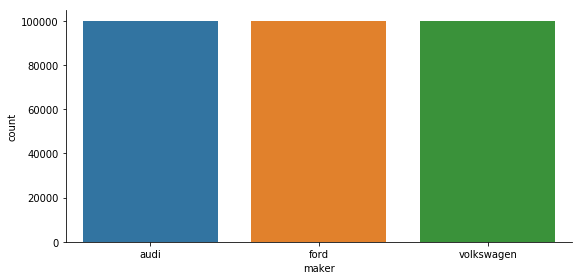

In [61]:
#Lets now explore the 'maker' categorical features
print(data['maker'].value_counts())
print(pd.unique(data['maker']))

sns.factorplot("maker",data=data,kind="count",aspect=2)

#Nothing much to do over here. Three car makers and all have the same number of rows. 

golf              32427
a3                28055
focus             27790
fiesta            17915
passat            15220
a4                13803
mondeo            13580
polo              11514
a6                 9178
c-max              7850
touran             7413
a1                 7000
a5                 6731
q5                 5548
kuga               5126
q3                 4563
s-max              4547
galaxy             4501
tiguan             4347
ka                 4320
caddy              4039
transit            3781
coupe              3526
q7                 3338
sharan             3045
a8                 2626
multivan           2436
golf-sportsvan     2342
tt                 2291
fusion             2242
                  ...  
puma                182
rs5                 166
cougar              160
explorer            152
s7                  100
gt                  100
vento                79
thunderbird          63
sierra               58
scorpio              58
probe           

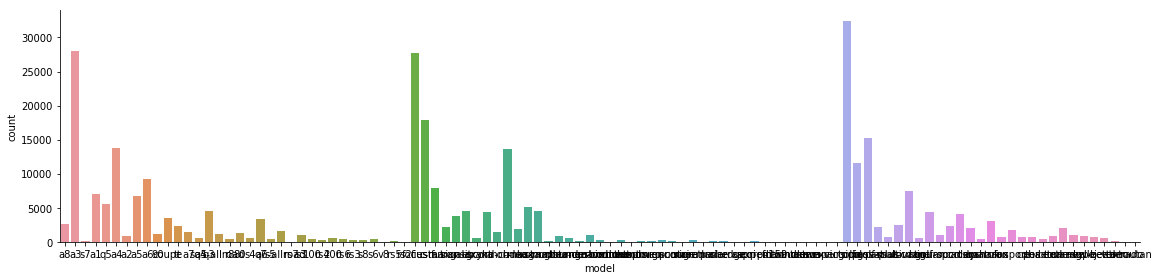

In [62]:
#Lets now explore the model feature
print(data['model'].value_counts())
print(pd.unique(data['model']))

sns.factorplot("model",data=data,kind="count",aspect=4)


#Couple of things we can do over here. There are around 105 category values which seems a lot. 
#How to group them generally requires a good domain/business knowledge. 
# 1. For example, all the sedans can be in one group. All the minivans can be in one group and so on. 
#    So we can boil doen the maker's category values to maybe much lower than original 105. 
# 2. Once we group, we can move the groups with a very low count to a single 'Other' grop to further reduce the categories. 
#    We can keep a threshold value for a lower cut. If the 'Other' group is pointed as an 'important' feature by the model, then 
#    we can see if there is some catgeory value which needs to be taken out from 'Other'.
# 3. for the purose of this exercise, as of now I am not planning to do any data transofrmation for the 'model' feature.


man     219799
auto     80201
Name: transmission, dtype: int64
['auto' 'man']


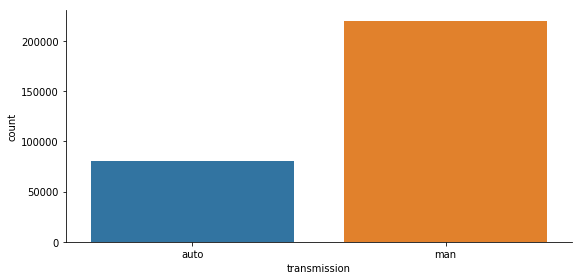

In [63]:
#Lets now explore the 'transmission' categorical features
print(data['transmission'].value_counts())
print(pd.unique(data['transmission']))

sns.factorplot("transmission",data=data,kind="count",aspect=2)

In [64]:
#Lets now explore the 'door_count' categorical features
print(data['door_count'].value_counts().sort_values())
print(pd.unique(data['door_count']))

# 1. The interesting thing is the door count is marked as a category value and not a numeric. 
# 2. The "1.0 and 1", '5.0 and 5" and more as considerd as different value. They should be considered as the same value. 
# 3. There is category value as "None" which doesn't make sense as how a car can have no door? It just seems bad data. 
# 4. I am getting rid of rows with value as 'None'. 
#    make "1.0 and 1" as same values. 

print(data.shape)
#Remove rows with 'None' value
data = data[data['door_count'] != 'None']

print(data.shape)
#Conver the column to integer type 
data['door_count'] = data['door_count'].astype(float)
print(data['door_count'].value_counts().sort_values())

# The door count values of 1,6,7 are very low. I even think these are bad values as which car has a door counts of 1,6,7? 
# So keeping the door count values reasnable to 2,3,4,5. I haven't seen a car with 3 door cont but the count (12249) is quite
# high to just remove it. So wiil keep it. 

lowerBoundDoorCount = 1
upperBoundDoorCount = 6

7           1
1           1
1.0         2
7.0         6
6          13
6.0        87
3        1261
None     6149
5        9046
3.0     14843
2       15058
2.0     20704
4       55942
4.0     83280
5.0     93607
Name: door_count, dtype: int64
['4.0' '4' '5.0' '3' 'None' '2' '2.0' '3.0' '5' '7.0' '7' '6' '6.0' '1.0'
 '1']
(300000, 10)
(293851, 10)
1.0         3
7.0         7
6.0       100
3.0     16104
2.0     35762
5.0    102653
4.0    139222
Name: door_count, dtype: int64


C:\Users\akarwa\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [65]:
#Lets now explore the 'seat_count' categorical features
print(data['seat_count'].value_counts().sort_values())
print(pd.unique(data['seat_count']))

#The same analysis/data preprocesisng will go for seat_count too.
print(data.shape)
#Remove rows with 'None' value
data = data[data['seat_count'] != 'None']

print(data.shape)
#Conver the column to integer type 
data['seat_count'] = data['seat_count'].astype(float)
print(data['seat_count'].value_counts().sort_values())

#Keeping the reasonable seat counts as 2,3,4,5,6,7,8,9

lowerBoundSeatCount = 1
upperBoundSeatCount = 10

55.0         1
57.0         1
18           1
74.0         1
1            1
20           1
18.0         2
14           2
13.0         2
15.0         3
12.0         3
10.0         4
17           5
10           5
17.0         7
1.0         11
8          105
6          237
9          500
8.0        586
3          841
6.0       1256
9.0       1378
2         1394
3.0       1771
7         2384
2.0       3000
None      5834
4         9677
7.0      11449
4.0      22528
5        60335
5.0     170526
Name: seat_count, dtype: int64
['5.0' '5' '4.0' '4' 'None' '2' '2.0' '7' '7.0' '3' '3.0' '6' '6.0' '9.0'
 '20' '1.0' '8.0' '9' '10.0' '8' '14' '10' '13.0' '15.0' '17' '1' '17.0'
 '12.0' '18.0' '18' '57.0' '74.0' '55.0']
(293851, 10)
(288017, 10)
57.0         1
74.0         1
20.0         1
55.0         1
14.0         2
13.0         2
18.0         3
12.0         3
15.0         3
10.0         9
1.0         12
17.0        12
8.0        691
6.0       1493
9.0       1878
3.0       2612
2.0       4394
7.0 

In [66]:
# Now lets remove the rows which are considered as outliers for any of the mileage, manufacture_year, displacement, horse_power, 
# price, door_count, seat_count based on the bounds calcualted above

print(data.shape)
data_subset = data[(data['mileage']>lowerBoundMileage) & 
                   (data['mileage']<upperBoundMileage)]
print(data_subset.shape)


data_subset = data_subset[(data_subset['manufacture_year']>lowerBoundManufactureYear) ]
print(data_subset.shape)


data_subset = data_subset[(data_subset['displacement']>lowerBoundDisplacement) & 
                          (data_subset['displacement']<upperBoundDisplacement)]
print(data_subset.shape)


data_subset = data_subset[(data_subset['horse_power']>lowerBoundHorsePower) & 
                          (data_subset['horse_power']<upperBoundHorsePower)]
print(data_subset.shape)


data_subset = data_subset[(data_subset['price']>lowerBoundPrice) & 
                          (data_subset['price']<upperBoundPrice)]
print(data_subset.shape)


data_subset = data_subset[(data_subset['door_count']>lowerBoundDoorCount) & 
                          (data_subset['door_count']<upperBoundDoorCount)]
print(data_subset.shape)


data_subset = data_subset[(data_subset['seat_count']>lowerBoundSeatCount) & 
                          (data_subset['seat_count']<upperBoundSeatCount)]
print(data_subset.shape)

(288017, 10)
(273461, 10)
(270472, 10)
(258687, 10)
(249485, 10)
(246635, 10)
(246538, 10)
(246496, 10)


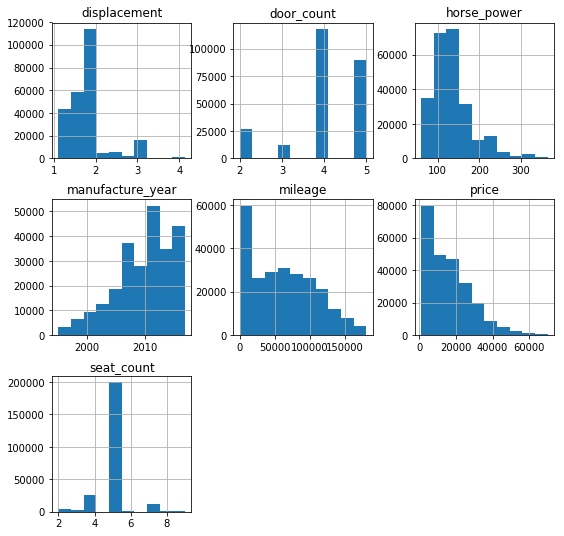

In [67]:
# Numeric feature distributions
data_subset.hist(figsize=(9,9))
plt.show()


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error


In [69]:
# Creat dummy variables
data_transformed = pd.get_dummies(data_subset)
data_transformed.head()

,mileage,manufacture_year,door_count,seat_count,displacement,horse_power,price,maker_audi,maker_ford,maker_volkswagen,...,model_tourneo-courier,model_tourneo-custom,model_transit,model_transporter,model_tt,model_up,model_vento,model_windstar,transmission_auto,transmission_man
0,136702.0,2006.0,4.0,5.0,3.94,271.0,12285.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,102526.0,2004.0,4.0,5.0,1.97,138.0,5500.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,684.0,2016.0,5.0,5.0,1.97,148.0,39649.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45006.0,2010.0,3.0,4.0,1.60,103.0,16848.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,136702.0,2012.0,4.0,5.0,1.97,168.0,25632.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
Y=data_transformed['price']
data_transformed=data_transformed.drop('price',axis=1)
data_transformed.head()

,mileage,manufacture_year,door_count,seat_count,displacement,horse_power,maker_audi,maker_ford,maker_volkswagen,model_100,...,model_tourneo-courier,model_tourneo-custom,model_transit,model_transporter,model_tt,model_up,model_vento,model_windstar,transmission_auto,transmission_man
0,136702.0,2006.0,4.0,5.0,3.94,271.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,102526.0,2004.0,4.0,5.0,1.97,138.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,684.0,2016.0,5.0,5.0,1.97,148.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45006.0,2010.0,3.0,4.0,1.60,103.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,136702.0,2012.0,4.0,5.0,1.97,168.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, Y, random_state=123)

### Notes:
Lets train a simple linear regression model and see what the R2 value and mean absolute error (MAE) looks like.

In [72]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("R coefficient:",r2_score(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

#It is kind of expected that the linear regression will perform less than random forest as we havent scaled the data. 

R coefficient: 0.777900377904
Mean absolute error: 3969.23613416


### Notes:
Lets try some feature engineering for.<br>
1. manufacture_year - convert it into age.<br>
2. miles_per_year - Less mile driven, higher the value? This feature will also help to differentiate between say car of 2015,2016 and both has same mileage.

In [73]:
# Age of car
data_transformed['car_age'] = 2018 - data_transformed.manufacture_year

#MilesPerYear
data_transformed['MilesPerYear'] = data_transformed['mileage']/(data_transformed['car_age']) 

#Drop columns which are transformed
data_transformed=data_transformed.drop('manufacture_year',axis=1)

In [74]:
data_transformed.head()

,mileage,door_count,seat_count,displacement,horse_power,maker_audi,maker_ford,maker_volkswagen,model_100,model_200,...,model_transit,model_transporter,model_tt,model_up,model_vento,model_windstar,transmission_auto,transmission_man,car_age,MilesPerYear
0,136702.0,4.0,5.0,3.94,271.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,12.0,11391.833333
1,102526.0,4.0,5.0,1.97,138.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,14.0,7323.285714
2,684.0,5.0,5.0,1.97,148.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,2.0,342.000000
4,45006.0,3.0,4.0,1.60,103.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,8.0,5625.750000
6,136702.0,4.0,5.0,1.97,168.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,6.0,22783.666667


In [75]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, Y, random_state=123)

In [76]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("R coefficient:",r2_score(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

R coefficient: 0.788822314216
Mean absolute error: 3898.0277079


### Notes:
We can see that the R2 increased and the MAE also dropped down after including the 'age' and 'miles_per_year' which is what we want. 

Now lets try to split the mileage in buckets and add those as features.

In [77]:
data_transformed['MileageLT10'] = np.where((data_transformed['mileage']<10000), 1, 0)

data_transformed['MileageLT25GT10'] = np.where((data_transformed['mileage']>9999) & (data_transformed['mileage']<25000) , 1, 0)

data_transformed['MileageLT50GT25'] = np.where((data_transformed['mileage']>24999) & (data_transformed['mileage']<50000) , 1, 0)

data_transformed['MileageLT75GT50'] = np.where((data_transformed['mileage']>49999) & (data_transformed['mileage']<75000) , 1, 0)

data_transformed['MileageLT100GT75'] = np.where((data_transformed['mileage']>74999) & (data_transformed['mileage']<100000) , 1, 0)

data_transformed['MileageLT125GT100'] = np.where((data_transformed['mileage']>99999) & (data_transformed['mileage']<125000) , 1, 0)

data_transformed['MileageLT150GT125'] = np.where((data_transformed['mileage']>124999) & (data_transformed['mileage']<150000) , 1, 0)

data_transformed['MileageGT150'] = np.where((data_transformed['mileage']>150000) , 1, 0)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, Y, random_state=123)

In [79]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print("R coefficient:",r2_score(y_test, y_pred))
print("Mean absolute error:",mean_absolute_error(y_test, y_pred))

R coefficient: 0.791790056543
Mean absolute error: 3867.21775438


### Notes:
* After adding different buckets for mileage, the performnace improved slighty.
* I think the buckets can be choosen more wisely based on busines knowledge or some more deatiled analysis. Right now I just choose the buckets on some intuition and lookng at the original distribution. But I think we can still exploit the feature more.
* Till now we did quite a lot of data cleaning and did some feature engineering to see how to improve the model performance. 
* The goal was to learn to detect the outliers, do some data cleaning and feature engineering. 
* <b>In future, we can do some more data preprocessing (like normalization) and data preprocessing (which more feature can be exploited?)</b>. 
* We can also implement a tree based regressor random forest) to see the important features for the model.
* That's it for now! Cheers!!!
